<a href="https://colab.research.google.com/github/VINAY35T/AIML_2025/blob/main/Lab08_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name='0'></a>
# 8. Decision Trees - Classification

Decision Trees are supervised machine learning algorithms that are used for both regression and classification tasks. Trees are powerful algorithms that can handle complex datasets.

In the previous notebook, we learnt to predict the continous values with decision trees (regression). This notebook is for classification.

Different to other algorithms, here are two things that trees are very particular about:

Here are 7 interesting facts about decision trees:

* They do not need the numerical input data to be scaled. Whatever the numerical values are, decision trees don't care.

* Decision trees handle categorical features in the raw text format (Scikit-Learn doesn't support this, TensorFlow's trees implementation does).

* Different to other complex learning algorithms, the results of decision trees can be interpreted. It's fair to say that decision trees are not blackbox type models.
* While most models will suffer from missing values, decision trees are okay with them.
* Trees can handle imbalanced datasets. You will only have to adjust the weights of the classes.
* Trees can provide the feature importances or how much each feature contributed to the model training results.
* Trees are the basic building blocks of ensemble methods such as random forests and gradient boosting machines.

The way decision trees works is like the series of if/else questions. Let's say that you want to make a decision of the car to buy. In order to get the right car to buy, you could go on and evaluate the level of the safety, the number of sits and doors by asking series of if like questions.

Here is the structure of the decision trees.

##(https://cdn.hashnode.com/res/hashnode/image/upload/v1632212349927/4XijLSXib.png)
![DT-Iris.png](attachment:41fd68f8-cfa9-40b0-9ba7-3a853d2edbef.png)

A well-known downside of decision trees is that they tend to overfit the data easily(pretty much assumed they will always overfit at first). One way to overcome overfitting is to reduce the maximum depth of the decision tree (refered to as `max_depth`hyperparameter) in decision trees. We will see other techniques to avoid overfitting.

## Decision Trees for Classification

### Contents

* [1 - Imports](#1)
* [2 - Loading the data](#2)
* [3 - Exploratory Analysis](#3)
* [4 - Preprocessing the data](#4)
* [5 - Training Decision Trees](#5)
* [6 - Evaluating Decision Trees](#6)
* [7 - Improving Decision Trees](#7)

<a name='1'></a>
## 1 - Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

<a name='2'></a>

## 2 - Loading the data

In this classification task with decision trees, we will use a car dataset that is avilable at [OpenML](https://www.openml.org/d/21) to predict the car acceptability given the information about the car. We will load it with Sklearn `fetch_openml` function.

The version of the data we are fetching is 2. In the version 1 of the dataset, the target class had 4 classes (unacc, acc, good, vgood) but in the second version, the majority class is Positive(P) whereas the rest are Negative(P). If you want to see version 1, you can change version parameter in a cell below.


Here are the informations about the features:

* *buying*: The buying price of the car(vhigh, high, med, low)
* maint: The maintainance price of the car(high, high, med, low)
* *doors*: The number of doors (2,3,4,5more)
* *persons*: The number of persons that can be carried the car. They are 2, 4, and more.
* *lug_boot*: The size of the luggage boot (small, med, big)
* *safety*: Estimated safefy of the car(low, med, high)
* *BinaryClass(target feature)*: The car acceptability class. Either positive(P) or negative(N).


In [2]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car', version=2, parser='auto')

In [3]:
type(car_data)

sklearn.utils._bunch.Bunch

In [4]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [5]:
car_data.details['version']

'2'

In [6]:
# Data description

print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [7]:
# Displaying feature names

car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [8]:
# Getting the whole dataframe

car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [9]:
type(car_data)

pandas.core.frame.DataFrame

<a name='3'></a>
## 3 - Exploratory Analysis


Before doing exploratory analysis, let's get the training and test data.

### Splitting Data into Training and Test sets

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.3,
                                         random_state=20)

print('The size of training data is: {} The size of testing data is: {}'.format(len(train_data),len(test_data)))

The size of training data is: 1209 The size of testing data is: 519


### Checking Summary Statistics

In [11]:
# Checking summary statistics

train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


### Checking Missing Values

In [12]:
# Checking missing values
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


We don't have any missing values.

### Checking Categorical Features

Let's inspect some categorical features that are in the
<br>dataset, almost all . Let's see that!

In [13]:
train_data['buying'].value_counts()

,count
buying,
med,327
high,307
vhigh,291
low,284


In [14]:
train_data['maint'].value_counts()

,count
maint,
high,311
med,311
vhigh,294
low,293


In [15]:
train_data['doors'].value_counts()

,count
doors,
5more,319
2,312
4,296
3,282


In [16]:
train_data['persons'].value_counts()

,count
persons,
more,418
2,407
4,384


<Axes: xlabel='buying', ylabel='count'>

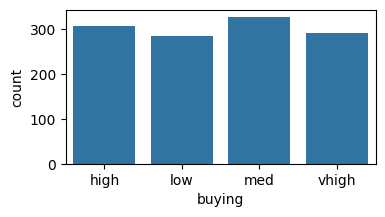

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

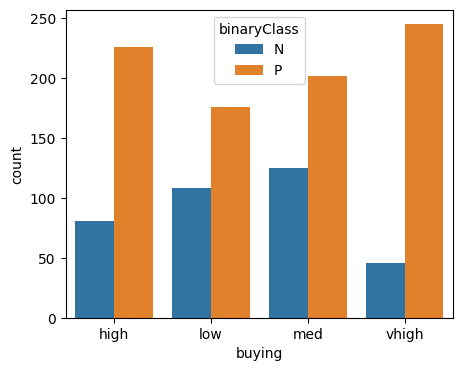

In [18]:
plt.figure(figsize=(5,4))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

As you can see above, the majority class in the buying price is median(`med`).

In [19]:
train_data['maint'].value_counts()

,count
maint,
high,311
med,311
vhigh,294
low,293


<Axes: xlabel='maint', ylabel='count'>

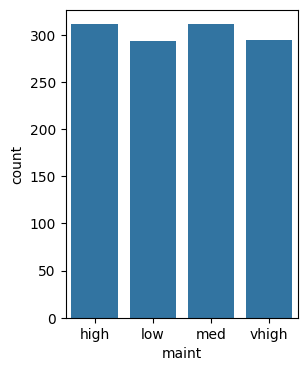

In [20]:
plt.figure(figsize=(3,4))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

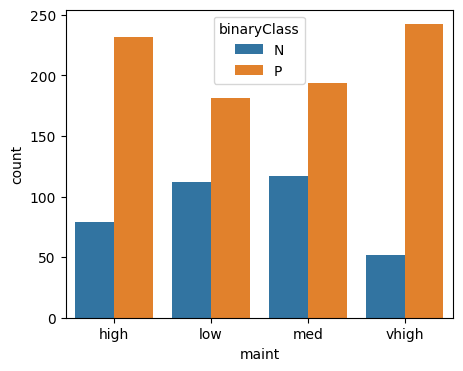

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

Let's also check what's in doors.

In [22]:
train_data['doors'].value_counts()

,count
doors,
5more,319
2,312
4,296
3,282


<Axes: xlabel='doors', ylabel='count'>

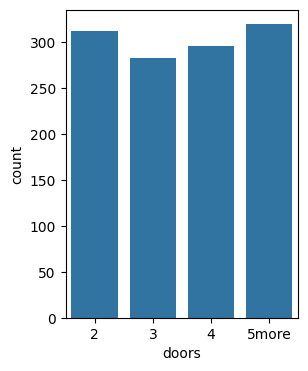

In [23]:
plt.figure(figsize=(3,4))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='doors', ylabel='count'>

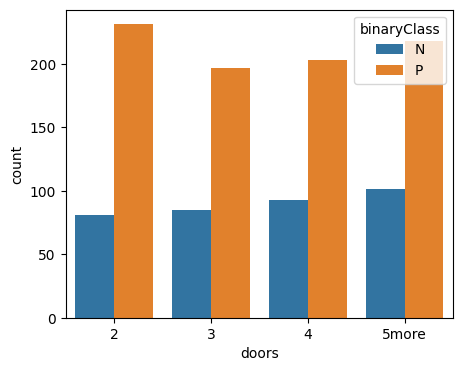

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

Nothing stunning in the maintenance cost. All cars share the same maintenance costs.

In [25]:
train_data['persons'].value_counts()

,count
persons,
more,418
2,407
4,384


<Axes: xlabel='persons', ylabel='count'>

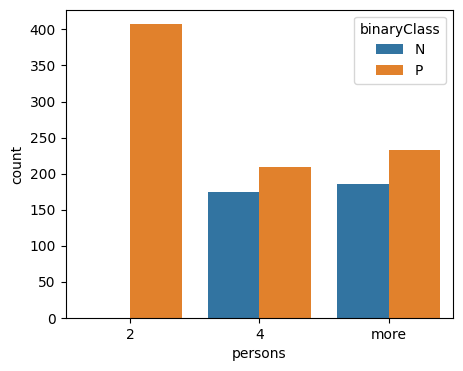

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [27]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
big,411
med,405
small,393


<Axes: xlabel='lug_boot', ylabel='count'>

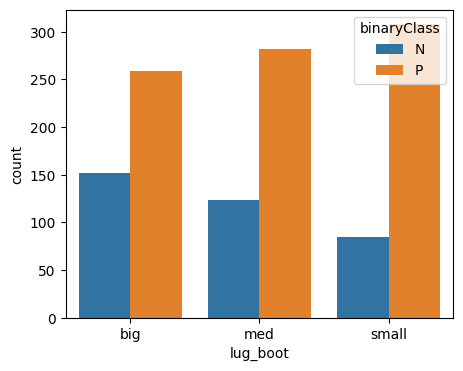

In [28]:
plt.figure(figsize=(5,4))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [29]:
train_data['safety'].value_counts()

,count
safety,
med,406
low,402
high,401


<Axes: xlabel='safety', ylabel='count'>

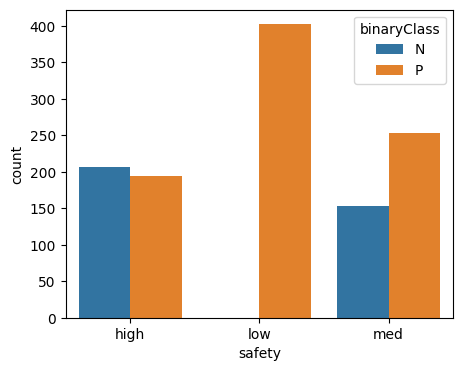

In [30]:
plt.figure(figsize=(5,4))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [31]:
train_data['binaryClass'].value_counts()

,count
binaryClass,
P,849
N,360


<Axes: xlabel='binaryClass', ylabel='count'>

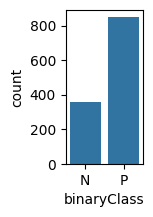

In [32]:
plt.figure(figsize=(1,2))
sns.countplot(data=train_data, x='binaryClass')

As you can see, our data is completely skewed/imbalanced. The positive examples are 2x more than negative examples.

So we will remember during the model evaluation that accuracy is not the right metric in this case. Real world datasets comes with their unique blends, dataset can be imbalanced. Missing values can be present. We just have to find the effective way to deal with those issues. So again for evaluation, we will not rely on accuracy.

<a name='4'></a>

## 4 - Data Preprocessing

It is here that we prepare the data to be in the proper format for the machine learning model.

### Handling Categorical Features

Decision trees don't care if the features are scaled or not, and they can handle the categorical features. There is a [note on documentation](https://scikit-learn.org/stable/modules/tree.html#tree) that the sklearn tree implementation doesn't support categorical features, so I will go ahead and handle them. It's fun anyways :)

Before handling categorical features, let's create a training input data and labels.

In [33]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

Let's create a pipeline to encode all features in the training input data.

In [34]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([('ord_enc', OrdinalEncoder())])

car_train_prepared = pipe.fit_transform(car_train)

Let's also handle labels. Labels contain P and N, <br>so we want to convert those into numbers. Here instead of using Ordinary Encoder,<br> we will use Label Encoder. Sklearn is explicity that it is used to encode target features.

In [35]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<a name='5'></a>

## 5 - Training Decision Tree Classifier


In [36]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

Let's train the same model on the scaled data.

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
text_representation = export_text(tree_clf)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- class: 1
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   | 

In [38]:
# if you run this, it will be error.
# SKlearn tree implementation doesn't support categorical features

#from sklearn.tree import DecisionTreeClassifier

#tree_clf = DecisionTreeClassifier()

#tree_clf.fit(car_train, car_labels)

<a name='6'></a>

## 6 - Evaluating Decision Trees

Let's build 3 functions to display accuracy, confusion matrix,<br> and classification report. Classification report contains all <br>useful metrics such as precision, recall, and f1 score.

In [39]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
    """
    Take the input data, model and labels and
    return accuracy
    """
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)
    return acc

In [40]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    """
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)

    return cm

In [41]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """
    Take the input data, model and labels and return classification report
    """
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)

    return report

Let's find the accuracy on the training set.

In [42]:
accuracy(car_train_prepared, tree_clf, car_labels_prepared)

1.0

Ohh, see! The decision trees overfitted the dataset.<br> Also if we remember well, our data is not balanced.<br> We have many positive examples than negative examples.

In [43]:
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)

array([[360,   0],
       [  0, 849]])

In [44]:
class_report(car_train_prepared, tree_clf, car_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209



The model clearly overfitted the data. Let's see how we can regularize it.

<a name='7'></a>

## 7 - Improving Decision Trees

In [45]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

One way to avoid overfitting is reduce number maximum depth of the tree, set by the hyperparameter `max_depth`. Similarly, we can attempt to reduce all hyperparameters with `max`term while also increasing the `min_` term parameters.

Also, I set the `class_weight` to `balanced` because our dataset is imbalanced. By setting it to balanced, the model will automatically adjust the class weight based on the number of available samples in all classes.


Let's use GridSearch to find best values of these hyperparameters.

In [46]:
# Let's hide warnings returned by grid search

import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [48]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [49]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [50]:
tree_best = grid_search.best_estimator_

We can also plot the tree of the improved model.

In [51]:
car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

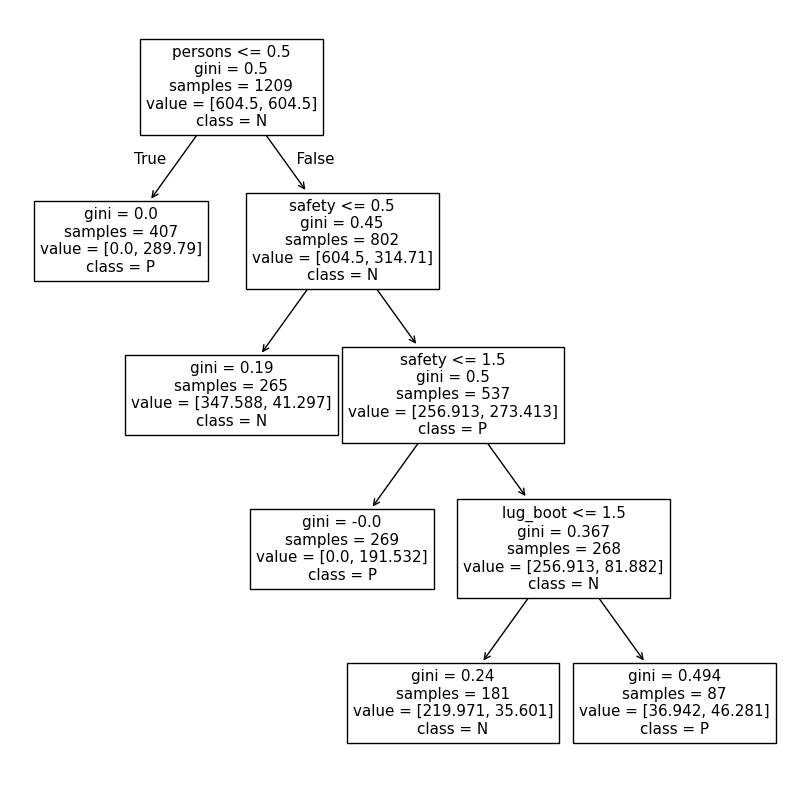

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

Let's make prediction on the training data again.

In [53]:
accuracy(car_train_prepared, tree_best, car_labels_prepared)

0.8924731182795699

In [54]:
conf_matrix(car_train_prepared, tree_best, car_labels_prepared)

array([[338,  22],
       [108, 741]])

In confusion matrix, each row represent an actual class and each column represents predicted class.

So, from the results above:

* 430 negative examples(N) were correcty predicted as negatives(`true negatives`).
* 28 negatives examples(N) were incorrectly classified as positive examples when they are in fact negatives(`false positives`).
* 139 positive examples were incorrectly classified as negative(N) when in fact they are positives(P) (`false negatives`).
* 958 were correctly classified as positive examples(`true positives`).

In [55]:
class_report(car_train_prepared, tree_best, car_labels_prepared)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       360
           1       0.97      0.87      0.92       849

    accuracy                           0.89      1209
   macro avg       0.86      0.91      0.88      1209
weighted avg       0.91      0.89      0.90      1209



Wow, this is much better. By only setting the class weight to `balanced` and finding the best values of the hyperparameters, we were able to improve our model.

If you remember, the negative class has fewer examples than the positive classes. You can see them in `support` in classification report. But our model is able to identify them correctly at 76%, and also is able to identify the positive examples at 97% without overfitting. That is precision.

A few notes about Precison/Recall/F1 score:

* Precision is the model accuracy on predicting positive examples correctly.
* Recall is the ratio of the positive examples that are correctly identified by the model.

* F1 score is the harmonic mean of precision and recall.

The higher the precision and recall are, the higher the F1 score. But there is a tradeoff between them. Increasing precision will reduce recall, and vice versa. So it's fair to say that it depends on the problem you're trying to solve and the metrics you want to optimize for.


### Evaluating the model on the test set

It is only after we have improved the model that we can feed it to the test set. If we try to show the test set to the model while we are still training, we may cause a potential leak thus producing misleading predictions.

Also, we will apply the same processing functions that we applied to the training set.

In [56]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

In [57]:
# Handling the categorical features with the pipeline that we defined early
# We don't fit on the test data. Only transform

car_test_prepared = pipe.transform(car_test)

In [58]:
# Handle labels too

car_test_labels_prepared = label_enc.transform(car_test_labels)

Now we can make predictions on the test set. We will only have to call the metrics functions we created previously.

In [59]:
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)

0.8805394990366089

In [60]:
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)

array([[145,  13],
       [ 49, 312]])

In [61]:
class_report(car_test_prepared, tree_best, car_test_labels_prepared)

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       158
           1       0.96      0.86      0.91       361

    accuracy                           0.88       519
   macro avg       0.85      0.89      0.87       519
weighted avg       0.90      0.88      0.88       519



The model never saw the test set but as you can see, the results are truly remarkable. The model can generalize well on the test set and that is because we improved it in the right ways.

This is the end of the notebook. We have learned how to build and how to regularize( or handle overfitting) the decion trees classifier.

[Back to top](#0)